In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths
data_dir = '/kaggle/input/rsbdsl38'
img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator instances for train, validation, and test sets with augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% train and 20% validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 9504 images belonging to 38 classes.
Found 2360 images belonging to 38 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, DenseNet121, ResNet50, DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Function to build a single model
def build_model(base_model, model_name):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(38, activation='softmax')(x)  # Assuming 38 classes
    
    model = Model(inputs, outputs, name=model_name)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load pre-trained models
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
den201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
den121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build and compile each model separately
model_1 = build_model(xception_model, model_name='Xception_Model')
model_2 = build_model(den201_model, model_name='InceptionV3_Model')
model_3 = build_model(resnet_model, model_name='ResNet50_Model')
model_4 = build_model(den121_model, model_name='EfficientNetB0_Model')

# Optionally, you can print summaries of each model to inspect their architecture
model_1.summary()
model_2.summary()
model_3.summary()
model_4.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "Xception_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,998,606 (87.73 MB)

 Trainable params: 22,944,078 (87.52 MB)

 Non-trainable params: 54,528 (213.00 KB)

Model: "InceptionV3_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,328,038 (77.55 MB)

 Trainable params: 20,098,982 (76.67 MB)

 Non-trainable params: 229,056 (894.75 KB)

Model: "ResNet50_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,724,838 (98.13 MB)

 Trainable params: 25,671,718 (97.93 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "EfficientNetB0_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,126,054 (31.00 MB)

 Trainable params: 8,042,406 (30.68 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Train the model
history = model_1.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_2.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_3.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_4.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


I0000 00:00:1723272049.714078     188 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723272049.791262     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.0412 - loss: 3.6387

W0000 00:00:1723272213.450159     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723272238.460184     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 278s 637ms/step - accuracy: 0.0412 - loss: 3.6385 - val_accuracy: 0.1441 - val_loss: 3.4574 - learning_rate: 1.0000e-05
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 148s 487ms/step - accuracy: 0.1867 - loss: 3.2419 - val_accuracy: 0.4703 - val_loss: 2.3255 - learning_rate: 1.0000e-05
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 147s 482ms/step - accuracy: 0.4852 - loss: 2.0989 - val_accuracy: 0.6725 - val_loss: 1.3433 - learning_rate: 1.0000e-05
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 203s 487ms/step - accuracy: 0.6697 - loss: 1.2632 - val_accuracy: 0.7589 - val_loss: 0.9378 - learning_rate: 1.0000e-05
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 147s 483ms/step - accuracy: 0.7744 - loss: 0.8525 - val_accuracy: 0.7949 - val_loss: 0.7367 - learning_rate: 1.0000e-05
Epoch 6/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 147s 485ms/step - accuracy: 0.8304 - loss: 0.6370 - val_accuracy: 0.8114 - val_loss: 0.6409 - learning_rate: 1.0000e-05
Epoch 7/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 147s 484ms/

W0000 00:00:1723276211.967191     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.0433 - loss: 3.8046

W0000 00:00:1723276379.639775     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723276420.709369     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 596s 705ms/step - accuracy: 0.0434 - loss: 3.8038 - val_accuracy: 0.2775 - val_loss: 2.9429 - learning_rate: 1.0000e-05
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 160s 528ms/step - accuracy: 0.2946 - loss: 2.7057 - val_accuracy: 0.6648 - val_loss: 1.5874 - learning_rate: 1.0000e-05
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 160s 527ms/step - accuracy: 0.6146 - loss: 1.5428 - val_accuracy: 0.7581 - val_loss: 0.9609 - learning_rate: 1.0000e-05
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 160s 527ms/step - accuracy: 0.7761 - loss: 0.8964 - val_accuracy: 0.8208 - val_loss: 0.6722 - learning_rate: 1.0000e-05
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 160s 527ms/step - accuracy: 0.8435 - loss: 0.6060 - val_accuracy: 0.8487 - val_loss: 0.5277 - learning_rate: 1.0000e-05
Epoch 1/50


W0000 00:00:1723277150.395197     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.0531 - loss: 3.8375

W0000 00:00:1723277279.447218     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 231s 480ms/step - accuracy: 0.0532 - loss: 3.8364 - val_accuracy: 0.0305 - val_loss: 4.1283 - learning_rate: 1.0000e-05
Epoch 2/50


W0000 00:00:1723277292.664081     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 440ms/step - accuracy: 0.3497 - loss: 2.4340 - val_accuracy: 0.0199 - val_loss: 3.9288 - learning_rate: 1.0000e-05
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 133s 437ms/step - accuracy: 0.6454 - loss: 1.2149 - val_accuracy: 0.6411 - val_loss: 1.3532 - learning_rate: 1.0000e-05
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 441ms/step - accuracy: 0.7718 - loss: 0.7584 - val_accuracy: 0.8089 - val_loss: 0.6392 - learning_rate: 1.0000e-05
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 442ms/step - accuracy: 0.8356 - loss: 0.5508 - val_accuracy: 0.8225 - val_loss: 0.5674 - learning_rate: 1.0000e-05
Epoch 1/50


W0000 00:00:1723277993.418336     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.0394 - loss: 3.9276

W0000 00:00:1723278131.081025     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723278145.416498     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 316s 513ms/step - accuracy: 0.0395 - loss: 3.9271 - val_accuracy: 0.1869 - val_loss: 3.2144 - learning_rate: 1.0000e-05
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 135s 444ms/step - accuracy: 0.1538 - loss: 3.1383 - val_accuracy: 0.4517 - val_loss: 2.2749 - learning_rate: 1.0000e-05
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 135s 443ms/step - accuracy: 0.4052 - loss: 2.2420 - val_accuracy: 0.6492 - val_loss: 1.5252 - learning_rate: 1.0000e-05
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 135s 444ms/step - accuracy: 0.5800 - loss: 1.5794 - val_accuracy: 0.7352 - val_loss: 1.1042 - learning_rate: 1.0000e-05
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 134s 442ms/step - accuracy: 0.6810 - loss: 1.1428 - val_accuracy: 0.7792 - val_loss: 0.8284 - learning_rate: 1.0000e-05


Found 11864 images belonging to 38 classes.
Model Accuracy: 96.94%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 49s 135ms/step

W0000 00:00:1723278759.137497     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step


W0000 00:00:1723278805.856757     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 35.00%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step  

W0000 00:00:1723278871.497482     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step


W0000 00:00:1723278933.903488     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 2.53%
  3/371 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step

W0000 00:00:1723278969.650594     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 38s 92ms/step


W0000 00:00:1723279003.767771     186 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 23.52%
  3/371 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step 

W0000 00:00:1723279043.898976     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step


W0000 00:00:1723279083.903279     185 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Ensemble Model Accuracy: 0.9694875252865812
Ensemble Model Loss: 2.5333798956125975


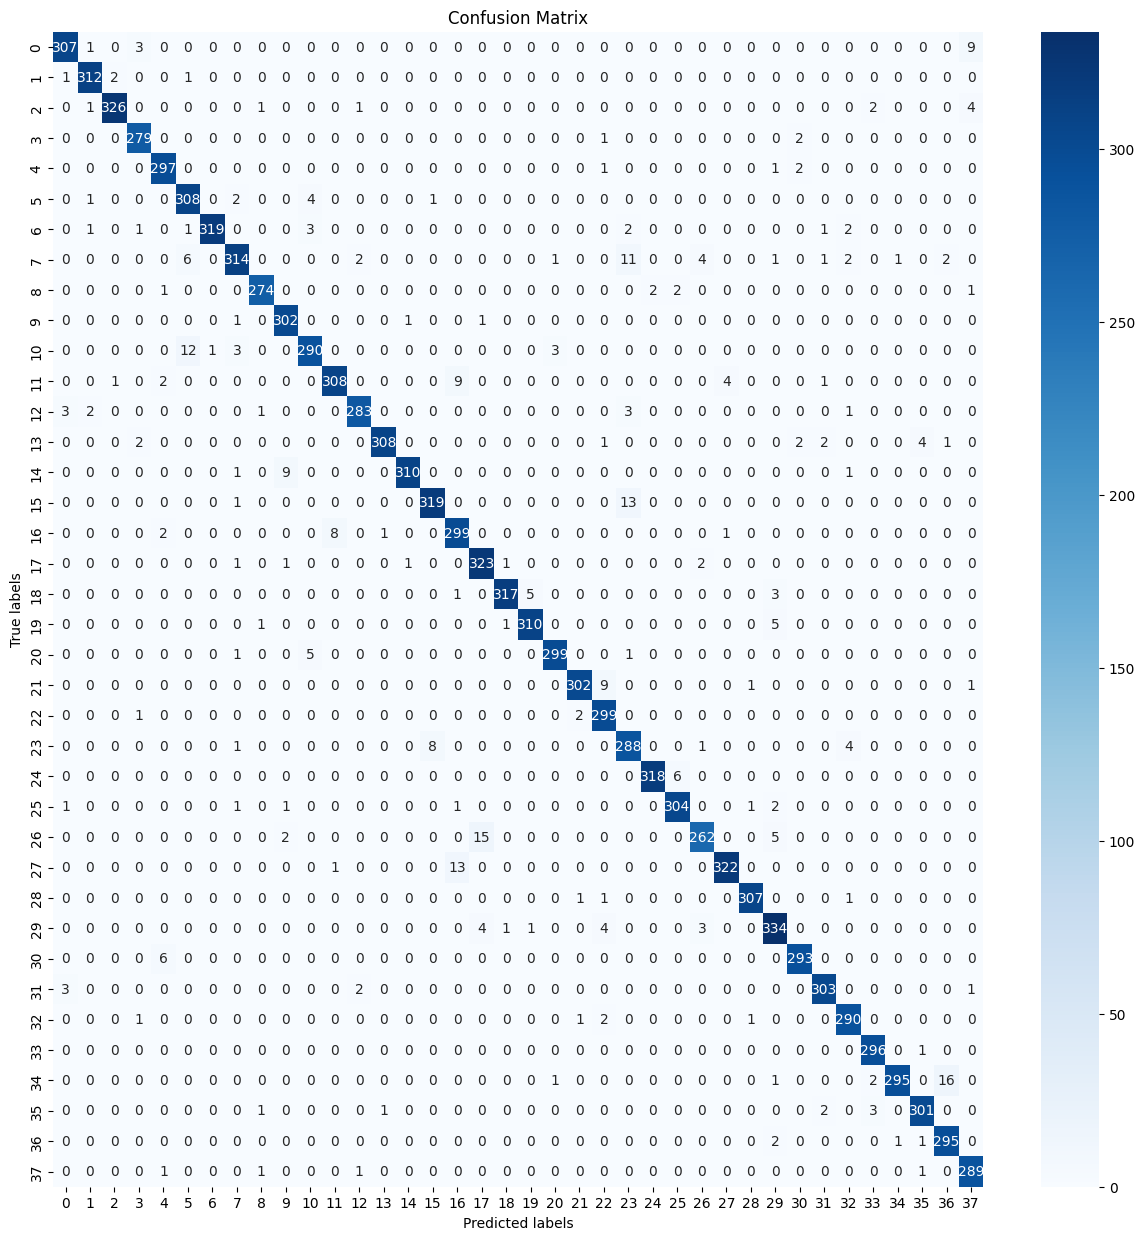

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       320
           1       0.98      0.99      0.98       316
           2       0.99      0.97      0.98       335
           3       0.97      0.99      0.98       282
           4       0.96      0.99      0.97       301
           5       0.94      0.97      0.96       316
           6       1.00      0.97      0.98       330
           7       0.96      0.91      0.94       345
           8       0.98      0.98      0.98       280
           9       0.96      0.99      0.97       305
          10       0.96      0.94      0.95       309
          11       0.97      0.95      0.96       325
          12       0.98      0.97      0.97       293
          13       0.99      0.96      0.98       320
          14       0.99      0.97      0.98       321
          15       0.97      0.96      0.97       333
          16       0.93      0.96      0.94       311
    

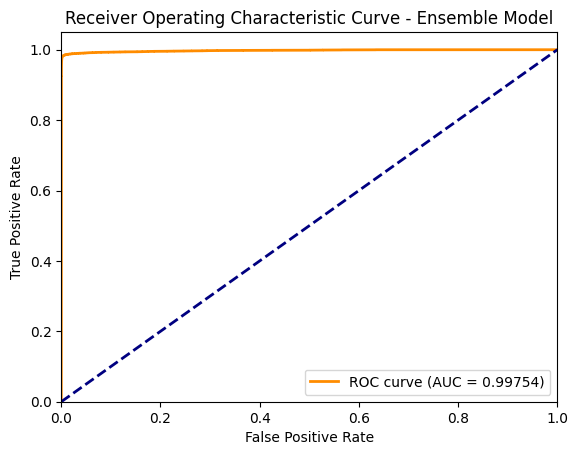

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
import numpy as np
import tensorflow as tf

# Assuming you have multiple models in a list
models = [model_1, model_2, model_3, model_4]  # Replace with your actual model variables

# Recheck Data Generators
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/rsbdsl38',  # Make sure this directory is correct
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency in predictions
)

# Evaluate each model on the test set and average their predictions
ensemble_predictions = None
test_loss = 0

for model in models:
    model_loss, model_acc = model.evaluate(test_generator, verbose=0)
    print(f'Model Accuracy: {model_acc * 100:.2f}%')
    
    # Summing losses for the ensemble
    test_loss += model_loss
    
    predictions = model.predict(test_generator)
    if ensemble_predictions is None:
        ensemble_predictions = predictions
    else:
        ensemble_predictions += predictions

# Average the predictions
ensemble_predictions /= len(models)
test_loss /= len(models)

# Evaluate the ensemble model
y_true = test_generator.classes
y_pred = np.argmax(ensemble_predictions, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Print average loss for the ensemble
print("Ensemble Model Loss:", test_loss)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate overall ROC AUC score
roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), ensemble_predictions, average='macro')
print("Overall ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true).ravel(), ensemble_predictions.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.show()